# Model Details:

In statistics, an additive model (AM) is a nonparametric regression method. It was suggested by Jerome H. Friedman and Werner Stuetzle (1981)[1] and is an essential part of the ACE algorithm. The AM uses a one-dimensional smoother to build a restricted class of nonparametric regression models. Because of this, it is less affected by the curse of dimensionality than e.g. a p-dimensional smoother. Furthermore, the AM is more flexible than a standard linear model, while being more interpretable than a general regression surface at the cost of approximation errors. Problems with AM include model selection, overfitting, and multicollinearity.

#### Overall Regression model
- The regression model is a two-way additive model with Age and celltype effects. The data are a full unreplicated design. Two-Factor ANOVA is multiple regression with two categorical explanatory
variables (or factors).

#### Per cell Regression model
- The regression model is a quasibinimial regression with Age effects. The data are a full unreplicated design.

## <h1><center>Quasibinomial model</center></h1>
$$ P(X=k)={n \choose k}p(p+k\phi)^{k-1}(1-p-k\phi)^{n-k} $$

# model resources:
- https://hansjoerg.me/2019/05/10/regression-modeling-with-proportion-data-part-1/

write style:
e.g. "The phagocyte prevalence ratio was exp(\beta_1) at baseline (95% CI...), this ratio decreased by exp(\gamma_1) at day 14 (95% CI...) and by exp(\gamma_2) at day 28 (95% CI). A global trend test for group was performed, the p-value was X.XX see figure X.
Ideally plot the predicted effect over time along with 95% CIs, since the last sentence is too technical for non-statistical reviewers.

## <h1><center>FACS correction</center></h1>

$$ CorrectedCounts = SortProportion_n* \Bigg[\frac{observed counts_i} {Sample Total_t}\Bigg] * Sample Total_t $$

- SortProportion : The proportion this gate was observed at during sorting for sample (n). (count/total_events)
- Group : cell counts contributed by the gate of interest (g)
- Total : Sum of counts of all cells contributed by this gating strategy (t)
- Observed_counts : The counts belonging to each annotated cellstate of interest (i) per donor

In [1]:
#Author: Issac Goh
#Date: 010620
#Modified: 010620

###############################################################################
###############################################################################
#Tips

# x is a dataframe with the following columns in this specific order:
# x$variable # celltype
# x$value # cell count
# x$batch # condition_donor
# x$timepoint # condition (e.g. adult, fetal)"

#If you are importing a metafata dataframe from another object, 
#use below to import and subset the data to columns of interest

#### Create a mapped FACs correction table module (optional)

In [188]:
Create_facs_map = FALSE
{
var_time = "age"
var_ID = "orig.ident"
var_sort = "sort.ids"
var_tissue = "origin"
meta_dat_add  = "/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/metadata/fbm_updated_20200718.csv" 
out_add_fname = "/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/facs_map.csv"
}

#This module checks if all variables are available in the FACs map, else, a sort probability of 1 will be added to the sample.
Check_facs_map = TRUE
{
facs_map_add = "/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/facs_sort_strategy/BM_Facs_gate_sort.csv"
meta_dat_add  = "/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/metadata/fbm_updated_20200718.csv"
var_time = "age"
var_ID = "orig.ident"
var_sort = "sort.ids"
var_tissue = "origin"
}

if (Create_facs_map == TRUE) {
    #Extract unique age, facs and identity
    meta = read.csv(meta_dat_add)
    #age = as.character(meta$fetal.ids)
    #age = gsub("SB19PCW","fca_SB_19PCW",age)
    #age = sapply(strsplit(age,c("_")), `[`, 3)
    #age = gsub("[+].","",age)
    #age = gsub("PCW","",age)
    #meta$age <- age
    out <- meta[c(var_ID,var_time,var_sort,var_tissue)]
    out$FACs_prop <- ""
    out_uni<-out[!duplicated(out),]
    write.csv(out_uni,out_add_fname)
    }

if (Check_facs_map == TRUE) {
    #Extract unique age, facs and identity
    meta <- read.csv(meta_dat_add)
    facs_map = read.csv(facs_map_add)
    #Check that gating strategy makes sense in reference to metadata
    ##To be written###
    for (c in c(var_time,var_ID,var_sort,var_tissue)){
    print(c)
    #check
    unique(meta[var_time])
    }
    }

[1] "age"
[1] "orig.ident"
[1] "sort.ids"
[1] "origin"


# Data Preperation module [concat and correct multiple metadata tables]

In [189]:
# - Give adresses of metadata to concat
#adrr<-("/Users/issac/Documents/Projects/Fetal Bone Marrow/BM_12052020_stats/meta_data_files/")

# - Concat data of interest
#concat_adrr_book<-function(){
#adress_book<- grep(list.files(path=adrr), pattern='concatenated_metadata.csv', inv=T, value=T)
#if ("met_concat"%in%ls()){
#  rm(met_concat)}
#for (met_adr_temp in adress_book){
#  met_temp <- read.csv(paste0(adrr,met_adr_temp))
#  if (!"met_concat"%in%ls()){
#    met_concat <- met_temp
#  }else{
#    met_concat <- plyr::rbind.fill(met_concat,met_temp)
#  }
#}
#return(met_concat)
#}
#met_concat<-concat_adrr_book()
#write.csv(met_concat,paste0(adrr,"concatenated_metadata.csv"))

########################################
#Annotation corrections:
#meta<-met_concat
#meta<-read.csv(meta_add,stringsAsFactors = F)

#unique(grep("MONO",meta$cell.labels[meta$origin=="ys"],value = T))
#unique(grep("Neut",meta$cell.labels,value = T))

#cells_keep[!cells_keep%in%unique(meta$cell.labels[meta$origin=="abm"])]
#Check annotations abm
#unique(meta$cell.labels[meta$cell.labels%in%cells_list&meta$origin=="abm"])
#unique(meta$cell.labels[meta$origin=="abm"])
#unique(grep("B",meta$cell.labels[meta$origin=="abm"],value = T))


# - Read cell_list for each fig and define which is current figure
fig_cell_list_key <- read.csv("/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/figure_cells/cell.labels by figures.csv",stringsAsFactors = F)
fig_of_interest<-"Figure.1"
cells_list<- as.character(unlist(fig_cell_list_key[fig_of_interest][!fig_cell_list_key[fig_of_interest]==""]))

In [190]:
cells_list

[1] "HSC_MPP"      "Erythroid"    "MK"           "B_lineage"    "DC"          
 [6] "Eo/baso/mast" "Neutrophil"   "Monocyte"     "T_NK"         "Stroma"

# Variables input module

In [191]:
# - choice of Negative binom of quasi binomial distribution ('quasi' or 'neg')
dist <- "quasi" 

# - metadata adress
meta_add<-"/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/metadata/fbm_updated_20200718.csv"

# - FACS correction strategy
FACS <- "/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/facs_sort_strategy/BM_Facs_gate_sort.csv"

# - output directory to create
output_dr<-"/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/out/bm_overall_090421/"

# - input dependent cateogircal variable containing cell.label information
dep_var<-"broad_fig1_cell.labels"

# - input independent cateogircal variable containing the test conditions (e.g stage/pcw/sex)
inde_var<-"age"

# - input categorical variable containing batch information (a column to compute dispersion coefficients)
batch<-"orig.ident"

# - input the sort_ids which correlate to the sorting stratey in the the metadata
use_facs_map = TRUE
var_sort = "sort.ids"
facs_map_add = "/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/resources/facs_sort_strategy/BM_Facs_gate_sort.csv"
correct_between = c("CD45-","CD45+")

# - run name
run_id <- "fig1_bm_by_age_quasi"

# - if input data needs to be subset give list of indpendent categroricals to be kept (e.g stage/pcw/sex or "all")
inde_keep<-c("all")

# - give list of cell labels in verbatim to metadata to subset the data by (note that the cell.labels of analougous populations must match across data)
cells_keep<- cells_list #()
meta = read.csv(meta_add,stringsAsFactors = F)
#cells_keep <- unique(meta[,dep_var])

#Only test overall: select if you only have one sample per timepoint on average
overall = FALSE

In [192]:
colnames(meta)

[1] "X"                       "index"                  
 [3] "cell.labels"             "doublets"               
 [5] "fetal.ids"               "gender"                 
 [7] "is_doublet"              "is_doublet_poptrim"     
 [9] "is_doublet_wolock"       "lanes"                  
[11] "nGene"                   "nUMI"                   
[13] "orig.ident"              "percent.mito"           
[15] "processing.type"         "scrublet_cluster_score" 
[17] "scrublet_score"          "sequencing.type"        
[19] "sort.ids"                "april_cell.labels"      
[21] "cell.labels_20200708"    "cell.labels_20200713"   
[23] "cell.labels_20200718"    "nk_meta"                
[25] "broad_fig1_cell.labels"  "broad_figS1_cell.labels"
[27] "stage"                   "origin"                 
[29] "age"

In [193]:
cells_list

[1] "HSC_MPP"      "Erythroid"    "MK"           "B_lineage"    "DC"          
 [6] "Eo/baso/mast" "Neutrophil"   "Monocyte"     "T_NK"         "Stroma"

In [194]:
unique(meta$'broad_fig1_cell.labels')[unique(meta$'broad_fig1_cell.labels') %in% cells_keep]

[1] "DC"        "HSC_MPP"   "B_lineage" "MK"        "T_NK"

# Env setup and functions module

In [195]:
#Inserting Age variable for BM
age = as.character(meta$fetal.ids)
age = gsub("SB19PCW","fca_SB_19PCW",age)
age = sapply(strsplit(age,c("_")), `[`, 3)
age = gsub("[+].","",age)
age = gsub("PCW","",age)
meta$age <- age

In [7]:
packageVersion('stats v4.0.4')

[1] ‘4.0.4’

In [196]:
{
#Function to install/load libraries required
libs<-c("base","dplyr","data.table","plyr","MASS","stringr","gdata","reshape2")#"equatiomatic"
pkg_check <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg)) 
    install.packages(new.pkg,repos = "https://cloud.r-project.org", dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}
pkg_check(libs)

#create and Set working directory
if (!file.exists(output_dr)){
dir.create(output_dr)
}
setwd(output_dr)

#Read the metadata and subset to independent and dependent categoricals of interest
if (!"meta"%in%ls()){
meta<-read.csv(meta_add,stringsAsFactors = F)
}

if (use_facs_map == TRUE){
    # facs correction module
    facs_map = read.csv(facs_map_add)
    meta<- meta[,c(batch,dep_var,inde_var,var_sort)]
    cells_keep <- toupper(cells_keep)
    meta[,dep_var]<-toupper(meta[,dep_var])
    
     if(inde_keep=="all"){
      print("option to use all independent variables chosen, automatically assigning comparison for everything")
    }else{
      print(paste0("option to subset of independent variables chosen, automatically assigning comparison for:",inde_keep))
      meta<-meta[(meta[,inde_var]%in%inde_keep),]
    }
    meta<-meta[(meta[,dep_var]%in%cells_keep),]

    #Check if unique labels count is equal to cell_keep
    if(!length(unique(meta[,dep_var])) == length(cells_keep)){
      warning("length of cell_list and unique labels is not equal, check spelling")
    }
    
    #Assign a freq count value per cell
    meta$freq = 1
    #Aggregate the metadata in by grouping variable ()
    meta[batch] <- as.vector(meta[batch])
    meta[,batch][is.na(meta[,batch])] <- "not_specified"
    x <- aggregate(meta[,c("freq")], meta[,c(colnames(meta)[!colnames(meta)%in%"freq"])], FUN = sum)
    #x[var_sort][x[var_sort]=="nan"] <-"Total"

    #convert all labels to uppercase (minimises errors)
    x <- as.data.frame(x%>%apply(2,toupper))
    #relabel and reorder x
    colnames(x)<- c("batch","variable","timepoint","sort","value")
    col_order <- c("value","timepoint","variable","batch","sort")
        x <- x[, col_order]

    #Create a mappable field in both dfs
    x$ident_sort <- paste0(x$batch,x$sort)
    x$ident_sort <- toupper(x$ident_sort)
    facs_map$ident_sort <- paste0(facs_map[,batch],facs_map[,var_sort])
    facs_map$ident_sort <- toupper(facs_map$ident_sort)
    x$value<-as.integer(x$value)

    #get the grouped counts for sort ids within defined "correct within" args
    x <- as.data.table(x)
    x_temp <- x[x$sort%in%correct_between]
    x_temp[, sample_total := sum(value), by = batch]
    x_temp[, lane_count := sum(value), by = ident_sort]
    x_unsorted <- x[!x$sort%in%correct_between]
    x_unsorted[, sample_total := sum(value), by = batch]
    x_unsorted[, lane_count := sum(value), by = ident_sort]
    x<-rbind(x_temp, x_unsorted)

    #map the multipliers
    x$sort_multiplier <- mapvalues(x$ident_sort,facs_map$ident_sort,as.numeric(facs_map$parent_Multiplier))

    #Make the corrections
    x$corrected_counts <- (as.numeric(x$sort_multiplier)/(x$lane_count/x$sample_total))*x$value
    x$pre_correction_counts <- x$value
    x$value <- x$corrected_counts
    
    #Convert data to proportional data if quasibinom option chosen
    if(dist=="quasi"){
        x_temp <- x[x$sort%in%correct_between]
        x_temp<- x_temp %>% dplyr::group_by(batch) %>% dplyr::mutate(percent = corrected_counts/sum(corrected_counts))
        x_unsorted <- x[!x$sort%in%correct_between]
        x_unsorted <- x_unsorted %>% dplyr::group_by(batch) %>% dplyr::mutate(percent = corrected_counts/sum(corrected_counts))
        x<-rbind(x_temp, x_unsorted)  
    }
    } #End of facs correction
    else{ #if no facs correction
    meta<- meta[,c(batch,dep_var,inde_var)]
    cells_keep <- toupper(cells_keep)
    meta[,dep_var]<-toupper(meta[,dep_var])

    if(inde_keep=="all"){
      print("option to use all independent variables chosen, automatically assigning comparison for everything")
    }else{
      print(paste0("option to subset of independent variables chosen, automatically assigning comparison for:",inde_keep))
      meta<-meta[(meta[,inde_var]%in%inde_keep),]
    }
    meta<-meta[(meta[,dep_var]%in%cells_keep),]

    #Check if unique labels count is equal to cell_keep
    if(!length(unique(meta[,dep_var])) == length(cells_keep)){
      warning("length of cell_list and unique labels is not equal, check spelling")
    }

    #Assign a freq count value per cell
    meta$freq = 1

    #Aggregate the metadata in by grouping variable ()
    meta[batch] <- as.vector(meta[batch])
    meta[,batch][is.na(meta[,batch])] <- "not_specified"
    x <- aggregate(meta[,c("freq")], meta[,c(colnames(meta)[!colnames(meta)%in%"freq"])], FUN = sum)
    #convert all labels to uppercase (minimises errors)
    x <- as.data.frame(x%>%apply(2,toupper))
    #relabel and reorder x
    colnames(x)<- c("batch","variable","timepoint","value")
    col_order <- c("value","timepoint","variable","batch")
    x <- x[, col_order]
    x$value<-as.integer(x$value)
    
    #Convert data to proportional data if quasibinom option chosen
    if(dist=="quasi"){
      x <- x %>% dplyr::group_by(batch) %>% dplyr::mutate(percent = value/sum(value))
    }
}


# Define all your conditions that group your replicates as the "batch variable" (e.g donors), this goes into df of conditional "variates"
len = length(unique(x$batch))
condition = as.data.frame(1: len)
colnames(condition)<-"len"
condition$len <-gsub("^","cond_",condition$len)
condition$cond <-unique(x$batch)

# Define the variates in "condition$cond" across dataset
conditions<-as.character(unique(x$timepoint))

# Define as many empty variables as many conditions you want to test:
n<-length(conditions)
test_vecs<-as.data.frame(gtools::combinations(n,2,conditions))

#Create a unpopulated df
score_results<- data.frame(row.names = paste0(test_vecs$V1,"_vs_",test_vecs$V2))
}

[1] "option to use all independent variables chosen, automatically assigning comparison for everything"


# Compute module

In [197]:
#overall
#nb = glm(formula = percent ~ timepoint+celltype, data = x1, family=quasibinomial)

In [198]:
# Compute the p-values for increasing labeled fraction (using negative binomial regression)
  if("score_results_concat"%in%ls()){
    remove(score_results_concat)
  }
spearman_tot <-vector()
  pv_tot <-vector()
  for(i in 1:length(unique(x$variable))){
    #pv_temp<-vector()
    pv_temp<-rep("NA",NROW(score_results))
    temp_test_list<-vector()
    x$variable <- factor(x$variable)
    cell = levels(x$variable)[i]
    totals = aggregate(x$value, by = list(x$batch), FUN = sum)
    colnames(totals) <- c("batch", "total")
    d = data.frame(subset(x, variable == cell))
    d <- merge(d, totals, by = "batch")
    #QC block
    if(any(d$total == 0)) {
      warning("Removing sample that didn't detect this celltype")
      d = subset(d, total > 0)
    }
    if(length(unique(d$timepoint))<=1){
      warning("One or fewer unique independent variables detected in loop, proceeding with next loop")
    }else{
      for (ref in 1:NROW(test_vecs)){
        temp_vec<-test_vecs[ref,]
        reference <- as.character(unlist(temp_vec[1]))
        test <-as.character(unlist(temp_vec[2]))
        test_name<-paste0(reference,"_v_",test)
        temp_test_list[ref] = test_name
        #test block
        
        if (!overall==TRUE){
        if(reference%in%d$timepoint&&test%in%d$timepoint){
          x1 = d[d$timepoint %in% c(reference, test), ]
          if(dist=="quasi"){
            nb = glm(formula = percent ~ timepoint, data = x1, family=quasibinomial)
            #Error checking
            t <- try(anova(nb, test = "F")$`Pr(>F)`[2])
            if("try-error" %in% class(t)){pv_temp[ref]<-"NA"}else{
            pv_temp[ref] = anova(nb, test = "F")$`Pr(>F)`[2]
            }
            score_results[,cell] <- pv_temp
          }else{
            nb = MASS::glm.nb(formula = value ~ timepoint + offset(log(as.numeric(x1$total))), data = x1, maxit = 1000)#, control=glm.control(trace = 3))
              tryCatch(anova(nb, test = "LRT")$`Pr(>Chi)`[2],error=function(e){pv_temp[ref]<<-"NA"})
              pv_temp[ref] = anova(nb, test = "LRT")$`Pr(>Chi)`[2]
              score_results[,cell] <- pv_temp
          }
        }
        }
      }
      #Compute overall score
      if(dist=="quasi"){
        d <- aggregate(d[,c("percent")], d[,c("batch",'timepoint')], FUN = sum)
        d$percent <- d$x
        nb_tot = glm(formula = percent ~ timepoint, data = d, family=quasibinomial)
        #Error checking
        t <- try(anova(nb_tot, test = "F")$`Pr(>F)`[2])
        if("try-error" %in% class(t)){pav_tot_val<-"NA"}else{
        pav_tot_val<-anova(nb_tot, test = "F")$`Pr(>F)`[2]
        }
      if(is.na(pav_tot_val)==FALSE){
        pv_tot[i] = pav_tot_val
      }else{
        pv_tot[i] <- "NA"
      }
      }else{
        nb_tot = MASS::glm.nb(formula = value ~ timepoint + offset(log(as.numeric(d$total))), data = d, maxit = 1000)#, control=glm.control(trace = 3))
        pav_tot_val <- anova(nb_tot, test = "LRT")$`Pr(>Chi)`[2]
      if(is.na(pav_tot_val)==FALSE){
        pv_tot[i] = pav_tot_val
      }else{
        pv_tot[i] <- "NA"
      }
      }
    #test sperman's
    spearman <- cor.test(d$percent,as.numeric(d$timepoint),method = "spearman")
    pval_spearman <- spearman$p.value
    spearman_tot[i] <- pval_spearman
      
    }
    #if(!"score_results_concat"%in%ls()){
    #  score_results_concat<-score_results
    #}else{
    #  score_results_concat<-cbind(score_results_concat,score_results)
    #}
  }
  score_results_final<-rbind(score_results,spearman_tot,pv_tot)
  base::row.names(score_results_final[NROW(score_results_final),])<-"overall"


###############################################################################
###############################################################################
####results module####
rownames(score_results_final)[rownames(score_results_final)%in%rownames(tail(score_results_final,2))] <- c("Spearmans_test","overall_per_cell")
score_results_final<-score_results_final[,order(colnames(score_results_final))]

#add sig codes
sig_codes<- tail(score_results_final,1)
for (z in colnames(sig_codes)){
     if(sig_codes[z][,1]<0.00099){
       sig_codes[z]<-"***" }
    if(sig_codes[z][,1]<0.0099){
       sig_codes[z]<-"**" }
    if(sig_codes[z][,1]<0.05){
       sig_codes[z]<-"*" }
    else{sig_codes[z] <- 'ns'}
}
rownames(sig_codes)<-"sig_codes"
score_results_final<-rbind(score_results_final,sig_codes)

#add overarching pval for  two-way additive model with celltype and time
tot <- aggregate(x[,c("percent")], x[,c("batch",'timepoint','variable')], FUN = sum)
nb_overall = glm(formula = percent ~  variable + timepoint, data = tot, family=quasibinomial)
pav_overall_val<-anova(nb_overall, test = "F")
pav_overall_val<-tail(pav_overall_val,1)[,"Pr(>F)"]
score_results_final[nrow(score_results_final)+1,][1]<-pav_overall_val
rownames(score_results_final)[rownames(score_results_final)==rownames(tail(score_results_final,1))] <-"overarching_all_cells_all_timepoints"

date<-gsub( " .*$", "", Sys.time())
write.csv(score_results_final,paste0(output_dr,"/",run_id,"_",date,".csv"))

Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(d$percent, as.numer

Error in if (dispersion == 1) Inf else object$df.residual : 
  missing value where TRUE/FALSE needed


Warning message in cor.test.default(d$percent, as.numeric(d$timepoint), method = "spearman"):
“Cannot compute exact p-value with ties”


[1] 1.361743e-16

In [199]:
test <- aggregate(tot[,c("percent")], tot["batch"], FUN = sum)
test

batch,x
<chr>,<dbl>
F21,1
F29,2
F30,2
F38,1
F41,1
F45,1
F50,1
F51,1
SB19PCW,1


# Trend testing

In [200]:
#Decide if prop goes up or down (use non-parametric trend test)

direction = NULL
cell_list = NULL
rho = NULL
r = NULL
for(i in 1:length(unique(x$variable))) {
  cell = levels(x$variable)[i]
  d = data.frame(subset(x, variable == cell))
  totals = aggregate(d$percent, by = list(d$timepoint), FUN = sum)
  colnames(totals) <- c("timepoint", "total")
  d <- merge(d, totals, by = "timepoint")
  d <- d[(!d$timepoint=="STAGE 4"),]
  
  #Create order for factors
  order(unique(d$timepoint))
  d$factor_levels <- ordered(d$timepoint, levels = c("STAGE 1", "STAGE 2", "STAGE 3", "STAGE 4"))
  #d$factor_levels <- ordered(d$timepoint, levels = c("DOWNS", "FBM"))
  d1<-d[!duplicated(d$timepoint),]
  d1$time_factor <- order(d1$factor_levels)
  
  if(length(unique(d$timepoint))>=2){
    print("parameters met to use Bartels trend test statistic")
    #d1$time_factor<-order(d1$timepoint)
    ts_d<-as.ts(d1)
    #sig<-bartels.test(ts_d)
    sig <- cor.test(d1$percent,d1$time_factor,method = "spearman")
    t <- try(cor.test(d1$percent,d1$time_factor,method = "pearson"))
    if("try-error" %in% class(t)){ 
        sig2 <-"NA"
        r <- append(r, "NA")}else{
    sig2 <- cor.test(d1$total,d1$time_factor,method = "pearson")
    r <- append(r, sig2$estimate)
    }
      
    
    cell_list <- append(cell_list,cell)
    rho<- append(rho,sig$estimate)
    if(as.numeric(sig$estimate) == '1' ){
      #direction <- append(direction,"No_direction")
      reference <-as.character(d1$timepoint[d1$time_factor== min(d1$time_factor)]) # !
      test <- as.character(d1$timepoint[d1$time_factor== max(d1$time_factor)]) # !
      x1 = d[d$time %in% c(reference, test), ]
      x_sums_test <- sum(x1$value[x1$timepoint==test])
      x_sums_ref<- sum(x1$value[x1$timepoint==reference])
      if(x_sums_test > x_sums_ref){
        direction <- append(direction,"up")
      }else{
        direction<-append(direction,"down")
      }
    }else if(sig$estimate > '0' ){
      direction<-append(direction,"up")
    }else{
      direction<-append(direction,"down")
    }
    
  }else{
    #If no statistic can be applied, use simple arithmic and compare largest to smallest factor
    reference <-as.character(d1$timepoint[d1$time_factor== min(d1$time_factor)]) # !
    test <- as.character(d1$timepoint[d1$time_factor== max(d1$time_factor)]) # !
    x1 = d[d$time %in% c(reference, test), ]
    x_sums_test <- sum(x1$value[x1$timepoint==test])
    x_sums_ref<- sum(x1$value[x1$timepoint==reference])
    
    cell_list <- append(cell_list,cell)
    rho<- append(rho,"NA")
    r<- append(r,"NA")
    if(x_sums_test > x_sums_ref){
      direction <- append(direction,"up")
    }else{
      direction<-append(direction,"down")
    }
  }
}
polarity<-data.frame(cell_list,direction,rho,r)
write.csv(polarity,"/nfs/team205/ig7/work_backups/backup_210306/scripts_dont_modify/neg_binom/out/reviewers_overall_bm_polarity.csv")
#pv$polarity_of_change <- direction

[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"
[1] "parameters met to use Bartels trend test statistic"


# Append polarity scores to score sheet

In [201]:
polarity <- as.data.frame((t(polarity)))
polarity <- as.data.frame(polarity)
names(polarity) <- as.character(unlist(polarity[1,]))
polarity = polarity[-1,]
polarity_scores <- rbind(score_results_final,(polarity))

date<-gsub( " .*$", "", Sys.time())
write.csv(polarity_scores,paste0(output_dr,"/",run_id,"_polarity_scores_",date,".csv"))

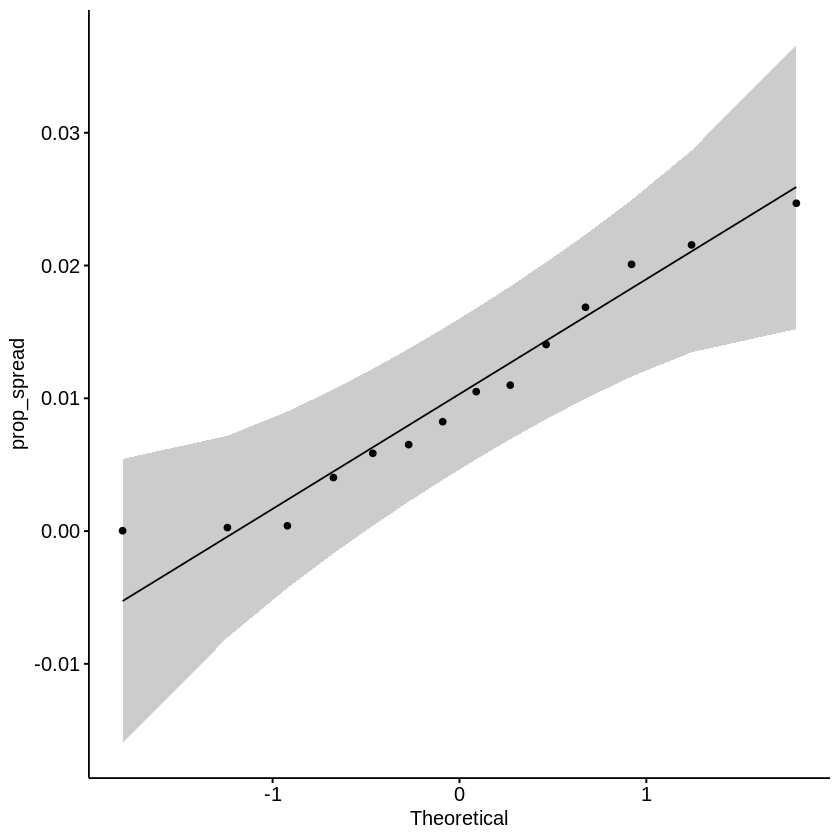

In [204]:
library("ggpubr")

ggqqplot(d$percent, ylab = "prop_spread")

In [3]:
facs_gating_df <- read.csv("~/mount/gdrive/Pan_fetal/meta_share/030621_FACs_gating_proportions.csv")

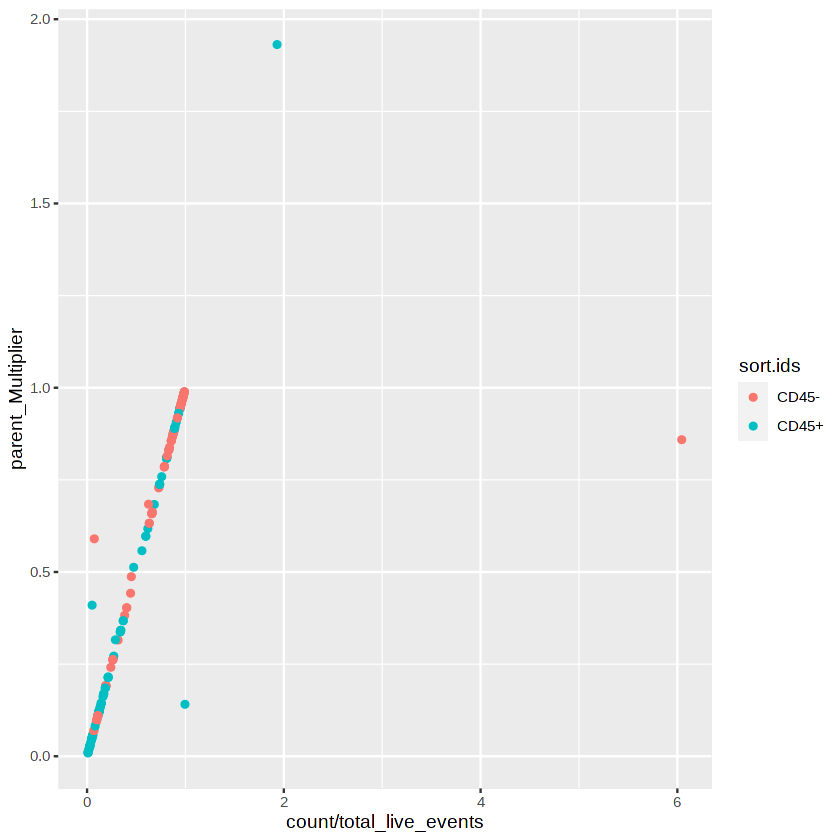

In [13]:
library(ggplot2)
library(dplyr)

facs_gating_df %>%
    filter(sort.ids %in% c("CD45+", "CD45-")) %>%
ggplot(aes(count/total_live_events, parent_Multiplier, color=sort.ids)) + geom_jitter()